In [1]:
import graphviz
import uuid
from functools import wraps
from IPython.display import display

class CallVisualizer:
    def __init__(self):
        self.nodes = []
        self.edges = []
        self.current_call_id = None

    def record_call(self, func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            call_id = str(uuid.uuid4())
            parent_call_id = self.current_call_id
            self.current_call_id = call_id

            # 记录函数名称和参数
            args_repr = [repr(a) for a in args]
            kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]
            signature = ", ".join(args_repr + kwargs_repr)
            label = f"{func.__name__}({signature})"

            self.nodes.append((call_id, label))
            if parent_call_id:
                self.edges.append((parent_call_id, call_id))

            result = func(*args, **kwargs)

            self.current_call_id = parent_call_id
            return result

        return wrapper

    def visualize(self):
        dot = graphviz.Digraph()

        for node, label in self.nodes:
            dot.node(node, label)

        for edge in self.edges:
            dot.edge(*edge)

        display(dot)
        return dot


最长上升子序列

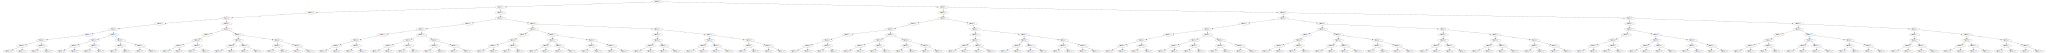

Length of Longest Increasing Subsequence: 6


In [4]:
# 初始化调用可视化器
visualizer = CallVisualizer()

A = [-float('inf'), 10, 22, 9, 33, 21, 50, 41, 60, 80]

@visualizer.record_call
def FastLIS(i, j):
    if j == len(A):
        return 0

    keep = 0
    if A[i] < A[j]:
        keep = 1 + FastLIS(j, j + 1)

    skip = FastLIS(i, j + 1)

    return max(keep, skip)

# 添加哨兵和初始调用

result = FastLIS(0, 1)

# 可视化调用过程
visualizer.visualize()

print("Length of Longest Increasing Subsequence:", result)

最优二叉树

In [7]:
import sys

# 初始化可视化器（假设 CallVisualizer 已经定义，如前例）
visualizer = CallVisualizer()
p = [0.05, 0.4, 0.08, 0.04, 0.1, 0.1, 0.23]
@visualizer.record_call
def opt_bst(i, j):
    """
    递归计算从 i 到 j 的最优BST的成本
    :param p: 关键字的概率数组
    :param i: 开始索引
    :param j: 结束索引
    :return: 最优BST的最小成本
    """
    if j < i:  # 空树
        return 0
    if i == j:  # 只有一个关键字
        return p[i]
    
    # 初始化为无穷大
    min_cost = sys.float_info.max
    
    # 计算频率和总和
    freq_sum = sum(p[i:j+1])
    
    # 尝试将每个关键字作为根
    for r in range(i, j + 1):
        cost = opt_bst(i, r - 1) + opt_bst(r + 1, j)
        min_cost = min(min_cost, cost)
    
    return min_cost + freq_sum

# 示例关键字概率


# 计算最优BST的最小成本
min_cost = opt_bst(0, len(p) - 1)
print("Optimal BST Minimum Cost:", min_cost)

# 可视化递归调用过程
visualizer.visualize()


Optimal BST Minimum Cost: 2.18


MIS问题